<a href="https://colab.research.google.com/github/meriemdouider1/MOIS-8-2022/blob/main/mrmr_classif%20k%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [ ]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [ ]:
from mrmr import mrmr_classif

In [ ]:
help(mrmr_classif)

Help on function mrmr_classif in module mrmr.pandas:

mrmr_classif(X, y, K, relevance='f', redundancy='c', denominator='mean', cat_features=None, cat_encoding='leave_one_out', only_same_domain=False, return_scores=False, n_jobs=-1, show_progress=True)
    MRMR feature selection for a classification task
    Parameters
    ----------
    X: pandas.DataFrame
        A DataFrame containing all the features.
    y: pandas.Series
        A Series containing the (categorical) target variable.
    K: int
        Number of features to select.
    features: list of str (optional, default=None)
        List of numeric column names. If not specified, all numeric columns (integer and float) are used.
    relevance: str or callable
        Relevance method.
        If string, name of method, supported: "f" (f-statistic), "ks" (kolmogorov-smirnov), "rf" (random forest).
        If callable, it should take "X" and "y" as input and return a pandas.Series containing a (non-negative)
        score of re

In [ ]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [ ]:
# use mrmr classification
selected_features1 = mrmr_classif(X, Y, K = 10,relevance="rf")

100%|██████████| 10/10 [00:01<00:00,  5.88it/s]


In [ ]:
selected_features1

['Moy_IRM',
 'Amp3_TempJ',
 'Rad_Sept',
 'IPT_Moy',
 'Tmax_Avril',
 'Ph1_TempJ',
 'Min_IRM',
 'Sol_Argile',
 'Ovins',
 'Ph3_TempJ']

In [ ]:
S1=X[selected_features1]

In [ ]:
def specificite(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(specificite, greater_is_better=True)
def MCC(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(MCC, greater_is_better=True)
def présicion_positive(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
my_scorer2 = make_scorer(présicion_positive, greater_is_better=True)
def présicion_négative(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_neg =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_neg
my_scorer3 = make_scorer(présicion_négative, greater_is_better=True)
def VN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]
    return value
my_scorer4 = make_scorer(VN, greater_is_better=True)
def VP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,1]
    return value
my_scorer5 = make_scorer(VP, greater_is_better=True)
def FP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,1]
    return value
my_scorer6 = make_scorer(FP, greater_is_better=True)
def FN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,0]
    return value
my_scorer7 = make_scorer(FN, greater_is_better=True)

XGBClassifier


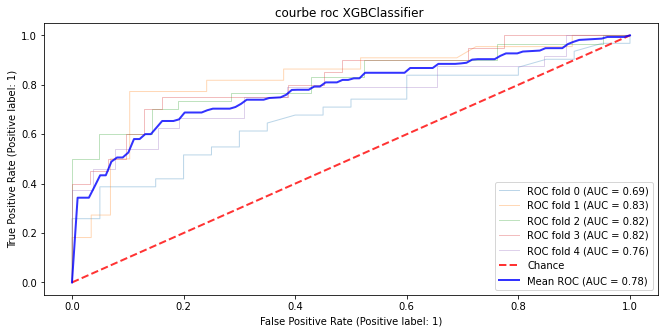

Accuracy: [0.60784314 0.76470588 0.76470588 0.7254902  0.7       ]
moy_accuracy: 0.71
-------------------------------------------------
sensibilité : [0.5483871  0.81818182 0.7        0.75       0.75      ]
moy_sensibilité: 0.71
-------------------------------------------------
spécificité : [0.7        0.72413793 0.85714286 0.70967742 0.65384615]
moy_spécificité: 0.73
-------------------------------------------------
MCC : [0.24371482 0.5372904  0.54935027 0.44963645 0.40482045]
MCC: 0.44
-------------------------------------------------
precision-po: [0.73913043 0.69230769 0.875      0.625      0.66666667]
moy_precision-po: 0.72
-------------------------------------------------
precision-ne : [0.5        0.84       0.66666667 0.81481481 0.73913043]
moy_precision-ne: 0.71
-------------------------------------------------
AUC : [0.68629032 0.82836991 0.81904762 0.82419355 0.76442308]
moy_AUC: 0.78
-------------------------------------------------
VN : [14 21 18 22 17]
VP : [17 18 21 15

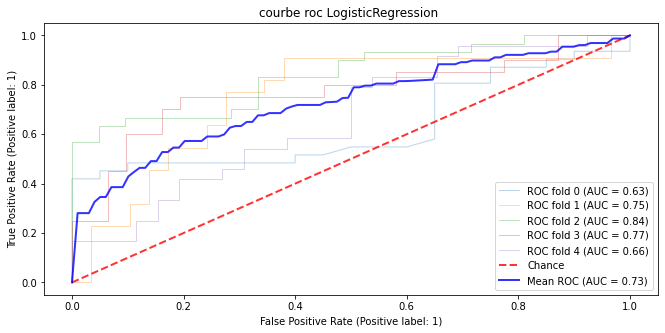

Accuracy: [0.56862745 0.7254902  0.70588235 0.78431373 0.58      ]
moy_accuracy: 0.67
-------------------------------------------------
sensibilité : [0.48387097 0.90909091 0.73333333 0.75       0.58333333]
moy_sensibilité: 0.69
-------------------------------------------------
spécificité : [0.7        0.5862069  0.66666667 0.80645161 0.57692308]
moy_spécificité: 0.67
-------------------------------------------------
MCC : [0.18240584 0.5073702  0.39748425 0.55201766 0.16012815]
MCC: 0.36
-------------------------------------------------
precision-po: [0.71428571 0.625      0.75862069 0.71428571 0.56      ]
moy_precision-po: 0.67
-------------------------------------------------
precision-ne : [0.46666667 0.89473684 0.63636364 0.83333333 0.6       ]
moy_precision-ne: 0.69
-------------------------------------------------
AUC : [0.63064516 0.7507837  0.83968254 0.76935484 0.66025641]
moy_AUC: 0.73
-------------------------------------------------
VN : [14 17 14 25 15]
VP : [15 20 22 15

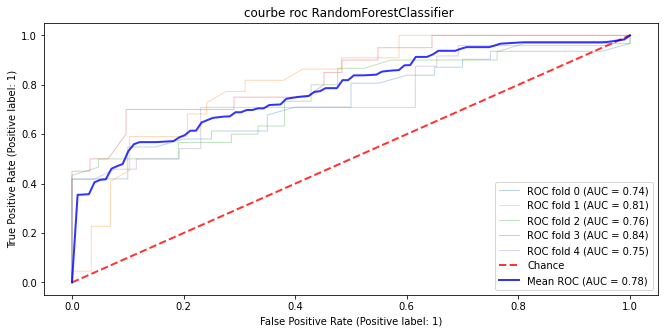

Accuracy: [0.66666667 0.70588235 0.62745098 0.70588235 0.74      ]
moy_accuracy: 0.69
-------------------------------------------------
sensibilité : [0.51612903 0.81818182 0.56666667 0.7        0.70833333]
moy_sensibilité: 0.66
-------------------------------------------------
spécificité : [0.9        0.62068966 0.71428571 0.70967742 0.76923077]
moy_spécificité: 0.74
-------------------------------------------------
MCC : [0.4251387  0.43887147 0.27788177 0.4019712  0.47871625]
MCC: 0.40
-------------------------------------------------
precision-po: [0.88888889 0.62068966 0.73913043 0.60869565 0.73913043]
moy_precision-po: 0.72
-------------------------------------------------
precision-ne : [0.54545455 0.81818182 0.53571429 0.78571429 0.74074074]
moy_precision-ne: 0.69
-------------------------------------------------
AUC : [0.74032258 0.81426332 0.76269841 0.83790323 0.74679487]
moy_AUC: 0.78
-------------------------------------------------
VN : [18 18 15 22 20]
VP : [16 18 17 14

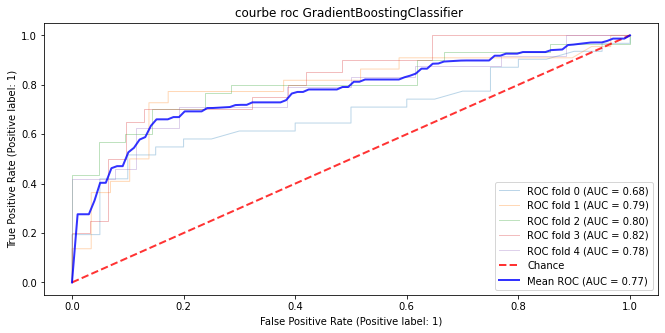

Accuracy: [0.66666667 0.70588235 0.74509804 0.70588235 0.72      ]
moy_accuracy: 0.71
-------------------------------------------------
sensibilité : [0.58064516 0.77272727 0.66666667 0.7        0.70833333]
moy_sensibilité: 0.69
-------------------------------------------------
spécificité : [0.8        0.65517241 0.85714286 0.70967742 0.73076923]
moy_spécificité: 0.75
-------------------------------------------------
MCC : [0.37523714 0.42458515 0.51808466 0.4019712  0.43910256]
MCC: 0.43
-------------------------------------------------
precision-po: [0.81818182 0.62962963 0.86956522 0.60869565 0.70833333]
moy_precision-po: 0.73
-------------------------------------------------
precision-ne : [0.55172414 0.79166667 0.62068966 0.78571429 0.73076923]
moy_precision-ne: 0.70
-------------------------------------------------
AUC : [0.68145161 0.78918495 0.8015873  0.81774194 0.76923077]
moy_AUC: 0.77
-------------------------------------------------
VN : [16 19 18 22 19]
VP : [18 17 19 14

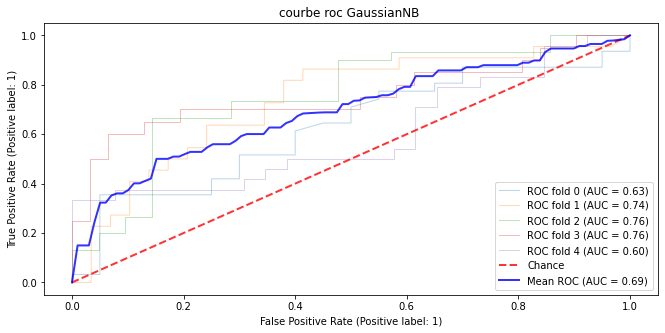

Accuracy: [0.54901961 0.50980392 0.70588235 0.64705882 0.46      ]
moy_accuracy: 0.57
-------------------------------------------------
sensibilité : [0.51612903 0.90909091 0.83333333 0.7        0.54166667]
moy_sensibilité: 0.70
-------------------------------------------------
spécificité : [0.6        0.20689655 0.52380952 0.61290323 0.38461538]
moy_spécificité: 0.47
-------------------------------------------------
MCC : [ 0.11359237  0.15795819  0.3788072   0.30559708 -0.07462028]
MCC: 0.18
-------------------------------------------------
precision-po: [0.66666667 0.46511628 0.71428571 0.53846154 0.44827586]
moy_precision-po: 0.57
-------------------------------------------------
precision-ne : [0.44444444 0.75       0.6875     0.76       0.47619048]
moy_precision-ne: 0.62
-------------------------------------------------
AUC : [0.62741935 0.73589342 0.75873016 0.75645161 0.59775641]
moy_AUC: 0.70
-------------------------------------------------
VN : [12  6 11 19 10]
VP : [16 20 

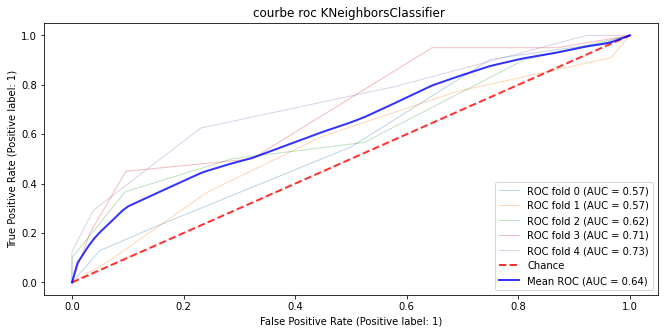

Accuracy: [0.52941176 0.56862745 0.58823529 0.60784314 0.7       ]
moy_accuracy: 0.60
-------------------------------------------------
sensibilité : [0.5483871  0.59090909 0.5        0.5        0.625     ]
moy_sensibilité: 0.55
-------------------------------------------------
spécificité : [0.5        0.55172414 0.71428571 0.67741935 0.76923077]
moy_spécificité: 0.64
-------------------------------------------------
MCC : [0.04733015 0.14131048 0.21428571 0.17741935 0.39905629]
MCC: 0.20
-------------------------------------------------
precision-po: [0.62962963 0.5        0.71428571 0.5        0.71428571]
moy_precision-po: 0.61
-------------------------------------------------
precision-ne : [0.41666667 0.64       0.5        0.67741935 0.68965517]
moy_precision-ne: 0.58
-------------------------------------------------
AUC : [0.57419355 0.57053292 0.62222222 0.70564516 0.72836538]
moy_AUC: 0.64
-------------------------------------------------
VN : [10 16 15 21 20]
VP : [17 13 15 10

In [ ]:
classifiers = {
"XGBClassifier": XGBClassifier(),
"LogisticRegression": LogisticRegression(),
"RandomForestClassifier": RandomForestClassifier(random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier()
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( S1, Y)):
         clf.fit( S1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  S1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores1 = cross_val_score(clf,  S1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  S1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, S1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, S1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, S1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, S1, Y, scoring=my_scorer3, cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf,  S1, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores8 = cross_val_score(clf,  S1, Y, scoring=my_scorer4, cv=cv, n_jobs=-1)
    scores9 = cross_val_score(clf,  S1, Y, scoring=my_scorer5, cv=cv, n_jobs=-1)
    scores10 = cross_val_score(clf,  S1, Y, scoring=my_scorer6, cv=cv, n_jobs=-1)
    scores11 = cross_val_score(clf,  S1, Y, scoring=my_scorer7, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores1)
    print('moy_accuracy: %.2f' % mean(scores1))
    print("-------------------------------------------------")
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print("-------------------------------------------------")
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print("-------------------------------------------------")
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print("-------------------------------------------------")
    print('precision-po:',scores5)
    print('moy_precision-po: %.2f' % mean(scores5))
    print("-------------------------------------------------")
    print('precision-ne :',scores6)
    print('moy_precision-ne: %.2f' % mean(scores6))
    print("-------------------------------------------------")
    print('AUC :',scores7)
    print('moy_AUC: %.2f' % mean(scores7))
    print("-------------------------------------------------")
    print('VN :',scores8)
    print('VP :',scores9)
    print('FP :',scores10)
    print('FN :',scores11)
    print("-------------------------------------------------")
    print("-------------------------------------------------")


In [ ]:
# use mrmr classification
selected_features2 = mrmr_classif(X, Y, K = 90,relevance="rf")

100%|██████████| 90/90 [00:08<00:00, 10.40it/s]


In [ ]:
selected_features2

['Moy_IRM',
 'Amp3_TempJ',
 'Rad_Sept',
 'IPT_Moy',
 'Tmax_Avril',
 'Ph1_TempJ',
 'Min_IRM',
 'Sol_Argile',
 'Ovins',
 'Ph3_TempJ',
 'Rad_Janv',
 'Rad_Mai',
 'Ph1_EVI',
 'Rad_Dec',
 'Max_IRM',
 'Tmin_Juill',
 'Var_EVI',
 'Tmax_Fev',
 'Min_TempJ',
 'IPT_Min',
 'Ph3_IRM',
 'Vent_Sept',
 'ProfAbs_Sub',
 'Ph1_NDVI',
 'Elev_Max',
 'Vent_Janv',
 'Bio_Tsec_Moy',
 'Tmax_Janv',
 'IPT_Med',
 'Y_lat',
 'Tmin_Aout',
 'Ph2_NDVI',
 'Moy_NDVI',
 'VegCul',
 'Bio_Tint',
 'RV_Min',
 'Ph1_TempN',
 'VarT_Cy_IRM',
 'Bio_Pre_Qhum',
 'Vent_Oct',
 'IR_sd',
 'Amp2_TempN',
 'Ph2_IRM',
 'Var_TempJ',
 'Sol_Carbone_stock',
 'VarT_ann_NDVI',
 'Prob_R',
 'Bio_Thum_Moy',
 'Rad_Oct',
 'Bio_Pre_Saison',
 'Caprins',
 'Moy_TempN',
 'VarT_cy_NDVI',
 'Amp3_TempN',
 'Bio_Tch_Moy',
 'Amp1_NDVI',
 'RV_Med',
 'Ph2_TempN',
 'Min_EVI',
 'Pente_Moy',
 'VarT_bi_NDVI',
 'Rad_Nov',
 'Bio_Saison',
 'Amp2_TempJ',
 'Moy_EVI',
 'Ph3_TempN',
 'Tmax_Nov',
 'Sol_Carbone',
 'ZoneUrbaine',
 'Pl_herb',
 'Bio_Tmax',
 'IR_Moy',
 'Max_NDVI',
 'B

In [ ]:
S2=X[selected_features2]

XGBClassifier


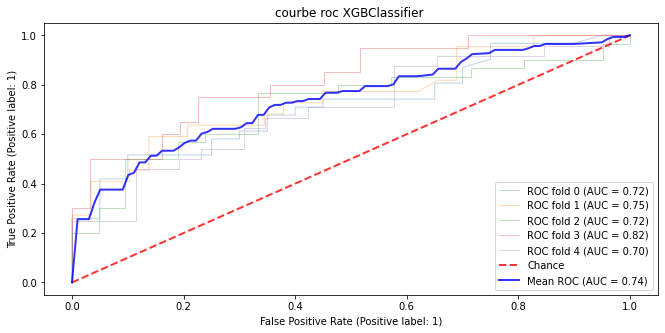

Accuracy: [0.62745098 0.62745098 0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.68
-------------------------------------------------
sensibilité : [0.5483871  0.72727273 0.76666667 0.75       0.66666667]
moy_sensibilité: 0.69
-------------------------------------------------
spécificité : [0.75       0.55172414 0.66666667 0.77419355 0.61538462]
moy_spécificité: 0.67
-------------------------------------------------
MCC : [0.29414776 0.27899687 0.43333333 0.51674606 0.28205128]
MCC: 0.36
-------------------------------------------------
precision-po: [0.77272727 0.55172414 0.76666667 0.68181818 0.61538462]
moy_precision-po: 0.68
-------------------------------------------------
precision-ne : [0.51724138 0.72727273 0.66666667 0.82758621 0.66666667]
moy_precision-ne: 0.68
-------------------------------------------------
AUC : [0.71774194 0.7484326  0.71746032 0.81774194 0.70192308]
moy_AUC: 0.74
-------------------------------------------------
VN : [15 16 14 24 16]
VP : [17 16 23 15

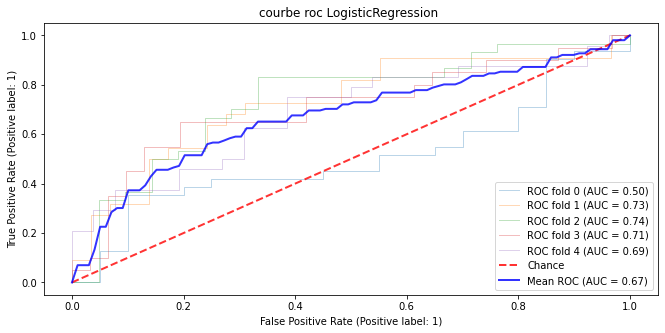

Accuracy: [0.49019608 0.64705882 0.66666667 0.70588235 0.64      ]
moy_accuracy: 0.63
-------------------------------------------------
sensibilité : [0.35483871 0.86363636 0.66666667 0.65       0.5       ]
moy_sensibilité: 0.61
-------------------------------------------------
spécificité : [0.7        0.48275862 0.66666667 0.74193548 0.76923077]
moy_spécificité: 0.67
-------------------------------------------------
MCC : [0.05679618 0.36393013 0.3286711  0.38881244 0.28022427]
MCC: 0.28
-------------------------------------------------
precision-po: [0.64705882 0.55882353 0.74074074 0.61904762 0.66666667]
moy_precision-po: 0.65
-------------------------------------------------
precision-ne : [0.41176471 0.82352941 0.58333333 0.76666667 0.625     ]
moy_precision-ne: 0.64
-------------------------------------------------
AUC : [0.48064516 0.71159875 0.74285714 0.70645161 0.70032051]
moy_AUC: 0.67
-------------------------------------------------
VN : [14 14 14 23 20]
VP : [11 19 20 13

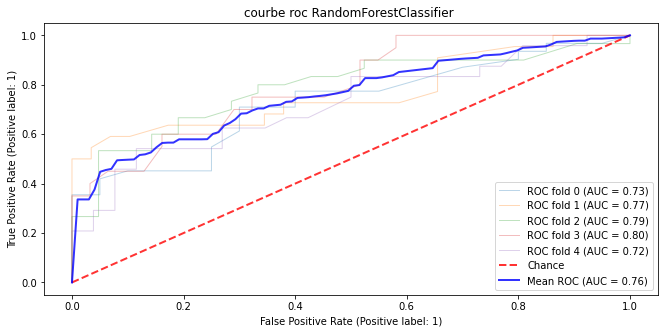

Accuracy: [0.62745098 0.64705882 0.70588235 0.70588235 0.62      ]
moy_accuracy: 0.66
-------------------------------------------------
sensibilité : [0.5483871  0.72727273 0.63333333 0.7        0.66666667]
moy_sensibilité: 0.66
-------------------------------------------------
spécificité : [0.75       0.5862069  0.80952381 0.70967742 0.57692308]
moy_spécificité: 0.69
-------------------------------------------------
MCC : [0.29414776 0.3120159  0.43801703 0.4019712  0.24417742]
MCC: 0.34
-------------------------------------------------
precision-po: [0.77272727 0.57142857 0.82608696 0.60869565 0.59259259]
moy_precision-po: 0.67
-------------------------------------------------
precision-ne : [0.51724138 0.73913043 0.60714286 0.78571429 0.65217391]
moy_precision-ne: 0.66
-------------------------------------------------
AUC : [0.72822581 0.76724138 0.78730159 0.79677419 0.72195513]
moy_AUC: 0.76
-------------------------------------------------
VN : [15 17 17 22 15]
VP : [17 16 19 14

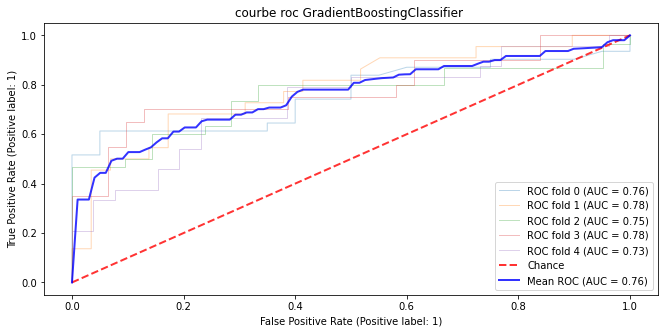

Accuracy: [0.68627451 0.68627451 0.66666667 0.68627451 0.62      ]
moy_accuracy: 0.67
-------------------------------------------------
sensibilité : [0.61290323 0.72727273 0.7        0.7        0.70833333]
moy_sensibilité: 0.69
-------------------------------------------------
spécificité : [0.8        0.65517241 0.71428571 0.70967742 0.61538462]
moy_spécificité: 0.70
-------------------------------------------------
MCC : [0.45632652 0.35893417 0.31704101 0.4019712  0.36217949]
MCC: 0.38
-------------------------------------------------
precision-po: [0.7826087  0.56666667 0.75       0.63636364 0.61538462]
moy_precision-po: 0.67
-------------------------------------------------
precision-ne : [0.55172414 0.75       0.625      0.8        0.70833333]
moy_precision-ne: 0.69
-------------------------------------------------
AUC : [0.75806452 0.78134796 0.77936508 0.77258065 0.71794872]
moy_AUC: 0.76
-------------------------------------------------
VN : [16 19 14 22 16]
VP : [19 16 21 14

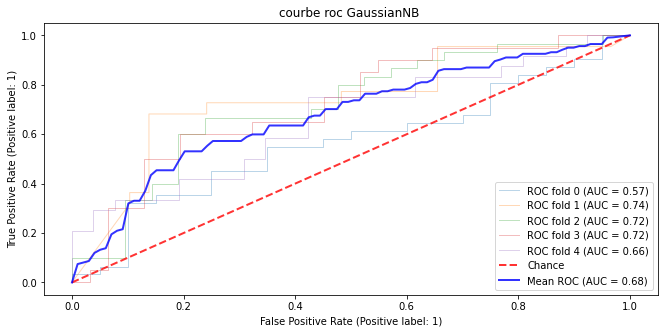

Accuracy: [0.52941176 0.60784314 0.68627451 0.58823529 0.6       ]
moy_accuracy: 0.60
-------------------------------------------------
sensibilité : [0.64516129 0.95454545 0.86666667 0.65       0.625     ]
moy_sensibilité: 0.75
-------------------------------------------------
spécificité : [0.35       0.34482759 0.42857143 0.5483871  0.57692308]
moy_spécificité: 0.45
-------------------------------------------------
MCC : [-0.00494347  0.36049288  0.33341044  0.19405363  0.20192308]
MCC: 0.22
-------------------------------------------------
precision-po: [0.60606061 0.525      0.68421053 0.48148148 0.57692308]
moy_precision-po: 0.57
-------------------------------------------------
precision-ne : [0.38888889 0.90909091 0.69230769 0.70833333 0.625     ]
moy_precision-ne: 0.66
-------------------------------------------------
AUC : [0.56612903 0.73824451 0.71587302 0.72096774 0.66025641]
moy_AUC: 0.68
-------------------------------------------------
VN : [ 7 10  9 17 15]
VP : [20 21 

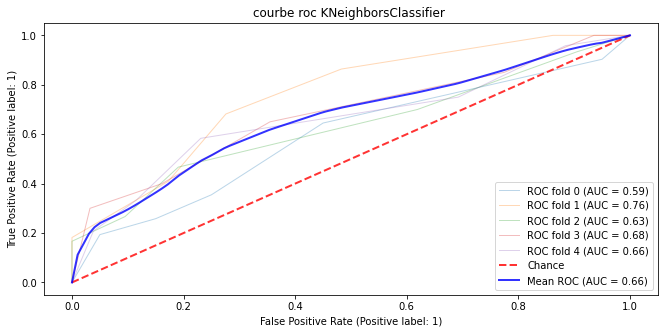

Accuracy: [0.50980392 0.70588235 0.60784314 0.64705882 0.68      ]
moy_accuracy: 0.63
-------------------------------------------------
sensibilité : [0.35483871 0.68181818 0.46666667 0.65       0.58333333]
moy_sensibilité: 0.55
-------------------------------------------------
spécificité : [0.75       0.72413793 0.80952381 0.64516129 0.76923077]
moy_spécificité: 0.74
-------------------------------------------------
MCC : [0.11031219 0.40406059 0.28443678 0.28871393 0.35954625]
MCC: 0.29
-------------------------------------------------
precision-po: [0.6875     0.65217391 0.77777778 0.54166667 0.7       ]
moy_precision-po: 0.67
-------------------------------------------------
precision-ne : [0.42857143 0.75       0.51515152 0.74074074 0.66666667]
moy_precision-ne: 0.62
-------------------------------------------------
AUC : [0.59274194 0.75862069 0.63095238 0.67983871 0.66266026]
moy_AUC: 0.66
-------------------------------------------------
VN : [15 21 17 20 20]
VP : [11 15 14 13

In [ ]:
classifiers = {
"XGBClassifier": XGBClassifier(),
"LogisticRegression": LogisticRegression(),
"RandomForestClassifier": RandomForestClassifier(random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier()
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( S2, Y)):
         clf.fit( S2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  S2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores1 = cross_val_score(clf,  S2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  S2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, S2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, S2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, S2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, S2, Y, scoring=my_scorer3, cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf,  S2, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    scores8 = cross_val_score(clf,  S2, Y, scoring=my_scorer4, cv=cv, n_jobs=-1)
    scores9 = cross_val_score(clf,  S2, Y, scoring=my_scorer5, cv=cv, n_jobs=-1)
    scores10 = cross_val_score(clf,  S2, Y, scoring=my_scorer6, cv=cv, n_jobs=-1)
    scores11 = cross_val_score(clf,  S2, Y, scoring=my_scorer7, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores1)
    print('moy_accuracy: %.2f' % mean(scores1))
    print("-------------------------------------------------")
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print("-------------------------------------------------")
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print("-------------------------------------------------")
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print("-------------------------------------------------")
    print('precision-po:',scores5)
    print('moy_precision-po: %.2f' % mean(scores5))
    print("-------------------------------------------------")
    print('precision-ne :',scores6)
    print('moy_precision-ne: %.2f' % mean(scores6))
    print("-------------------------------------------------")
    print('AUC :',scores7)
    print('moy_AUC: %.2f' % mean(scores7))
    print("-------------------------------------------------")
    print('VN :',scores8)
    print('VP :',scores9)
    print('FP :',scores10)
    print('FN :',scores11)
    print("-------------------------------------------------")
    print("-------------------------------------------------")
